## Tic-Tac-Toe Agent
​
In this notebook, you will learn to build an RL agent (using Q-learning) that learns to play Numerical Tic-Tac-Toe with odd numbers. The environment is playing randomly with the agent, i.e. its strategy is to put an even number randomly in an empty cell. The following is the layout of the notebook:
        - Defining epsilon-greedy strategy
        - Tracking state-action pairs for convergence
        - Define hyperparameters for the Q-learning algorithm
        - Generating episode and applying Q-update equation
        - Checking convergence in Q-values

#### Importing libraries
Write the code to import Tic-Tac-Toe class from the environment file

In [1]:
# from <TC_Env> import <TicTacToe> - import your class from environment file
import collections
import numpy as np
import random
import pickle
import time
from matplotlib import pyplot as plt
from TCGame_Env import TicTacToe
# defining object for the Tic Tac Toe Environment created as MDP in TCGame_Env
env = TicTacToe()

In [2]:
# Function to convert state array into a string to store it as keys in the dictionary
# states in Q-dictionary will be of form: x-4-5-3-8-x-x-x-x
#   x | 4 | 5
#   ----------
#   3 | 8 | x
#   ----------
#   x | x | x

def Q_state(state):

    return ('-'.join(str(e) for e in state)).replace('nan','x')

In [3]:
# Defining a function which will return valid (all possible actions) actions corresponding to a state
# Important to avoid errors during deployment.

def valid_actions(state):

    valid_Actions = []
    
    valid_Actions = [i for i in env.action_space(state)[0]] ###### -------please call your environment as env
    return valid_Actions

In [4]:
# Defining a function which will add new Q-values to the Q-dictionary. 
def add_to_dict(state):
    state1 = Q_state(state)
    
    valid_act = valid_actions(state)
    if state1 not in Q_dict.keys():
        for action in valid_act:
            Q_dict[state1][action]=0

In [5]:
#printing the default tic tac toe board positions
Q_state(env.state)

'x-x-x-x-x-x-x-x-x'

In [6]:
#printing all the valid actions
print(valid_actions(env.state))

[(0, 1), (0, 3), (0, 5), (0, 7), (0, 9), (1, 1), (1, 3), (1, 5), (1, 7), (1, 9), (2, 1), (2, 3), (2, 5), (2, 7), (2, 9), (3, 1), (3, 3), (3, 5), (3, 7), (3, 9), (4, 1), (4, 3), (4, 5), (4, 7), (4, 9), (5, 1), (5, 3), (5, 5), (5, 7), (5, 9), (6, 1), (6, 3), (6, 5), (6, 7), (6, 9), (7, 1), (7, 3), (7, 5), (7, 7), (7, 9), (8, 1), (8, 3), (8, 5), (8, 7), (8, 9)]


#### Epsilon-greedy strategy - Write your code here

(you can build your epsilon-decay function similar to the one given at the end of the notebook)

In [7]:
# Defining epsilon-greedy policy. You can choose any function epsilon-decay strategy
def epsilon_greedy(state, time, min_epsilon, max_epsilon, decay_rate):
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * time)
    z = np.random.random()
    
    if z > epsilon:
        state_next = Q_state(state)
        action = max(Q_dict[state_next], key = Q_dict[state_next].get)
    else:
        possible_action = [i for i in env.action_space(state)[0]]
        action = possible_action[np.random.choice(range(len(possible_action)))]
        
    return action

#### Tracking the state-action pairs for checking convergence - write your code here

In [8]:
# Initialise Q_dictionary as 'Q_dict' and States_tracked as 'States_track' (for convergence)
Q_dict = collections.defaultdict(dict)
States_track = collections.defaultdict(dict)

In [9]:
# Initialise states to be tracked
def initialise_tracking_states():
    Sample_Qvalues = [('x-x-x-x-x-x-x-x-x', (2, 9)), ('x-x-x-x-x-x-x-x-x',(1,9)), ('x-3-x-x-1-x-x-x-x',(7,5)), 
                      ('x-5-x-x-x-x-5-7-x', (8,2))] # selecting some 4 q values
    
    for q_values in Sample_Qvalues:
        state = q_values[0]
        action = q_values[1]
        States_track[state][action] = []

In [10]:
#Defining a function to save the Q-dictionary as a pickle file

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [11]:
def save_tracking_states():
    for state in States_track.keys():
        for action in States_track[state].keys():
            if state in Q_dict and action in Q_dict[state]:
                States_track[state][action].append(Q_dict[state][action])

In [12]:
initialise_tracking_states()

#### Define hyperparameters  ---write your code here

In [13]:
#defining the hyper parameters for training
EPISODES = 5000000
lr = 0.01 #learning rate
gamma = 0.9 #discount factor

max_epsilon = 1.0
min_epsilon = 0.001
decay_rate = 0.0001 #epsilon decay rate
threshold = 2000
policy_threshold = 3000

### Q-update loop ---write your code here

In [14]:
start_time = time.time()

for episode in range(EPISODES):
    ##### Start writing your code from the next line
    
    #initialize the environment
    env = TicTacToe()
    curr_state = env.state
    
    #boolean flag to indicate whether it is the final state
    done = False
    
    #adding the state to the dictionary
    add_to_dict(curr_state)
    
    while done!= True:
        curr_state1 = Q_state(curr_state)
        curr_action = epsilon_greedy(curr_state, episode, min_epsilon, max_epsilon, decay_rate) #applying epsilon method
        next_state, reward, done = env.step(curr_state, curr_action) #get the rewards
        next_state_temp = Q_state(next_state)
        add_to_dict(next_state)
        
        #updating the rules
        if done!= True:
            max_next = max(Q_dict[next_state_temp], key = Q_dict[next_state_temp].get)
            # get the action corresponding to max q-value of next state
            Q_dict[curr_state1][curr_action] += lr * ((reward + (gamma * (Q_dict[next_state_temp][max_next]))) - 
                                                      Q_dict[curr_state1][curr_action])
            
        else:
            Q_dict[curr_state1][curr_action] += lr *((reward - Q_dict[curr_state1][curr_action]))
            
        #navigating to the next state
        curr_state = next_state
        
    #track the states
    if ((episode+1)%threshold)==0:
        save_tracking_states()
        
        #saving the states tracked
        save_obj(States_track, 'States_tracking')
        print("States traker for episode:" + str(episode))
        
    #saving the Q-dict file after every policy threshold episodes
    if((episode+1)% policy_threshold) == 0:
        save_obj(Q_dict, 'Q_dict_policy')
        print("Policy updated for episode: " + str(episode))
    
elapsed_time = time.time() - start_time
print("Total elapsed time: ", elapsed_time)
save_obj(States_track,'States_tracked')   
save_obj(Q_dict,'Policy')

States traker for episode:1999
Policy updated for episode: 2999
States traker for episode:3999
States traker for episode:5999
Policy updated for episode: 5999
States traker for episode:7999
Policy updated for episode: 8999
States traker for episode:9999
States traker for episode:11999
Policy updated for episode: 11999
States traker for episode:13999
Policy updated for episode: 14999
States traker for episode:15999
States traker for episode:17999
Policy updated for episode: 17999
States traker for episode:19999
Policy updated for episode: 20999
States traker for episode:21999
States traker for episode:23999
Policy updated for episode: 23999
States traker for episode:25999
Policy updated for episode: 26999
States traker for episode:27999
States traker for episode:29999
Policy updated for episode: 29999
States traker for episode:31999
Policy updated for episode: 32999
States traker for episode:33999
States traker for episode:35999
Policy updated for episode: 35999
States traker for episod

#### Check the Q-dictionary

In [15]:
Q_dict

defaultdict(dict,
            {'x-x-x-x-x-x-x-x-x': {(0, 1): -0.9487985992483828,
              (0, 3): -0.9737323085944863,
              (0, 5): -0.9729671370628923,
              (0, 7): -0.9654451729280616,
              (0, 9): -0.9727036787053467,
              (1, 1): -0.9790460280273602,
              (1, 3): -0.974373183021448,
              (1, 5): 4.534723504891595,
              (1, 7): -0.9617585380448863,
              (1, 9): -0.9654455333528476,
              (2, 1): -0.944301226609113,
              (2, 3): -0.9725615486227374,
              (2, 5): -0.9700814412579585,
              (2, 7): -0.9625659170342614,
              (2, 9): -0.9738484678053889,
              (3, 1): -0.9734139135289503,
              (3, 3): -0.9698262615095197,
              (3, 5): -0.9667600218094841,
              (3, 7): -0.9751352360930536,
              (3, 9): -0.9871735686155777,
              (4, 1): -0.9757939320361189,
              (4, 3): -0.9633879573121801,
              (4, 5

In [16]:
len(Q_dict)

121188

#### Check the states tracked for Q-values convergence
(non-evaluative)

<function matplotlib.pyplot.show(*args, **kw)>

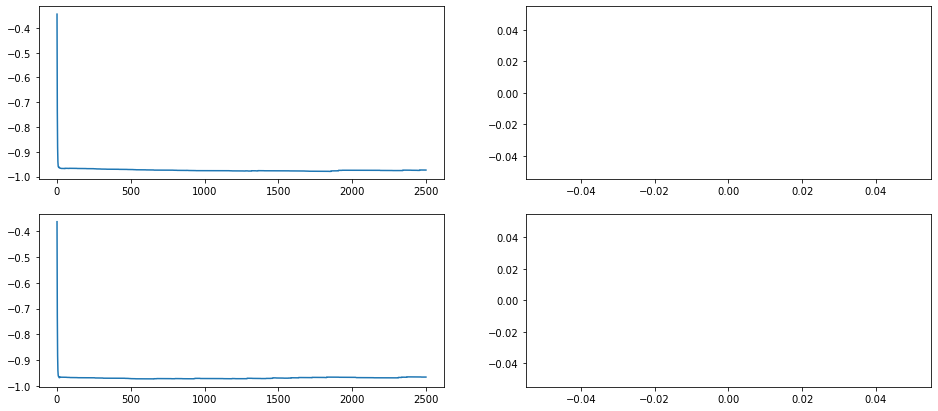

In [17]:
# Write the code for plotting the graphs for state-action pairs tracked
plt.figure(0, figsize=(16,7))

x_axis = np.asarray(range(0, len(States_track['x-x-x-x-x-x-x-x-x'][(2,9)])))
plt.subplot(221)
plt.plot(x_axis,np.asarray(States_track['x-x-x-x-x-x-x-x-x'][(2,9)]))
plt.show

x_axis = np.asarray(range(0, len(States_track['x-3-x-x-1-x-x-x-x'][(7,5)])))
plt.subplot(222)
plt.plot(x_axis,np.asarray(States_track['x-3-x-x-1-x-x-x-x'][(7,5)]))
plt.show

x_axis = np.asarray(range(0, len(States_track['x-x-x-x-x-x-x-x-x'][(1,9)])))
plt.subplot(223)
plt.plot(x_axis,np.asarray(States_track['x-x-x-x-x-x-x-x-x'][(1,9)]))
plt.show

x_axis = np.asarray(range(0, len(States_track['x-5-x-x-x-x-5-7-x'][(8,2)])))
plt.subplot(224)
plt.plot(x_axis,np.asarray(States_track['x-5-x-x-x-x-5-7-x'][(8,2)]))
plt.show

### Epsilon - decay check

In [18]:
max_epsilon = 1.0
min_epsilon = 0.001
time = np.arange(0,5000000)
epsilon = []
for i in range(0,5000000):
    epsilon.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000001*i))

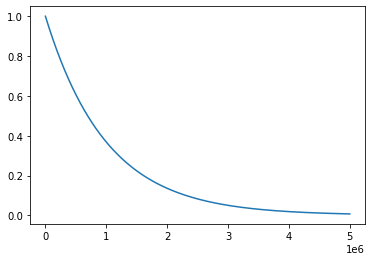

In [19]:
plt.plot(time, epsilon)
plt.show()